# Shopping Habits of Instacart Customers 

## Introduction

The project is based on the data from Instacart, a grocery delivery platform where customers can place a grocery order and have it delivered to them. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition, and will be working on the modified version of the data. The aim of this project is to clean up the data which includes five tables and prepare a report that gives insight into the shopping habits of Instacart customers.

## Data Overview

In [ ]:
# import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt

### Load the Datasets

In [ ]:
# load all datasets and set certain arguments to read the data correctly.
orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')
orders_products = pd.read_csv('order_products.csv', sep=';')

In [ ]:
# Display the first 5 rows of all the DataFrames
display(orders.head())
display(products.head())
display(orders_products.head())
display(aisles.head())
display(departments.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### Shape of all the DataFrames

In [ ]:
# Display the shape of all the DataFrame 
n_rows, n_cols = orders.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 478967 rows and 6 columns


In [ ]:
# Display the shape of the products DataFrame
n_rows, n_cols = products.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 49694 rows and 4 columns


In [ ]:
# Display the shape of the aisles DataFrame
n_rows, n_cols = aisles.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 134 rows and 2 columns


In [ ]:
# Display the shape of the departments DataFrame
n_rows, n_cols = departments.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 21 rows and 2 columns


In [ ]:
# Display the shape of the order products DataFrame
n_rows, n_cols = orders_products.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 4545007 rows and 4 columns


### Informative Summary of all the DataFrames

In [ ]:
# Display informative summary of the 'orders' DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# Dislay informative summary of the 'products' DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# Display the informative summary of the 'aisles' DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# Display the informative summary of the 'departments' DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [ ]:
# Display the informative summary of the 'orders_products' DataFrame
# Had to include show_counts = True to print the non-null counts as 'orders_products' has too many rows of data. 
orders_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


### Descriptive Statistics of all the DataFrames

In [ ]:
# Display descriptive statistics of the 'orders' DataFrame
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [ ]:
# Display descriptive statistics of the 'products' DataFrame
products.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [ ]:
# Display the descriptive statistics of the 'aisles' DataFrame
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [ ]:
# Display the descriptive statistics of the 'departments' DataFrame
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [ ]:
# Dislay descriptive statistics of the 'orders_products' DataFrame
orders_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


### Duplicates 

#### `orders` DataFrame

In [ ]:
# Check for duplicated orders
duplicated_orders = orders[orders.duplicated()]
print(f"Number of duplicated orders: {duplicated_orders.shape[0]}")

Number of duplicated orders: 15


In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
Wed_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(f"Number of order duplicates placed on Wednesday at 2:00 AM: {Wed_2am.shape[0]}")

Number of order duplicates placed on Wednesday at 2:00 AM: 121


In [ ]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [ ]:
# Double check for duplicate rows
no_duplicate_rows = orders[orders.duplicated()]
print(f"Number of duplicate rows: {no_duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Double check for duplicate order IDs only
no_do_ids = orders[orders.duplicated(subset='order_id')]
print(f"Number of duplicate order IDs: {no_do_ids.shape[0]}")

Number of duplicate order IDs: 0


#### `products` DataFrame

In [ ]:
# Check for fully duplicate rows
duplicated_products = products[products.duplicated()]
print(f"Number of duplicated products: {duplicated_products.shape[0]}")

Number of duplicated products: 0


In [ ]:
# Check for just duplicate product IDs
dp_ids = products[products.duplicated(subset='product_id')]
print(f"Number of duplicate product IDs: {dp_ids.shape[0]}")

Number of duplicate product IDs: 0


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['lowercase_product_name'] = products['product_name'].str.lower()

# Check for duplicate product names
duplicate_product_names = products[products.duplicated(subset='lowercase_product_name')]
print(f"Number of duplicate product names: {duplicate_product_names.shape[0]}")

Number of duplicate product names: 1361


In [ ]:
# Check for duplicate product names that aren't missing
product_names_not_missing = products.dropna(subset=['lowercase_product_name'])

duplicate_product_names_not_missing = product_names_not_missing[product_names_not_missing['lowercase_product_name'].duplicated()]

print(f"Number of duplicate product names that aren't missing: {duplicate_product_names_not_missing.shape[0]}")
display(duplicate_product_names_not_missing.head())

Number of duplicate product names that aren't missing: 104


,product_id,product_name,aisle_id,department_id,lowercase_product_name
2058,2059,Biotin 1000 Mcg,47,11,biotin 1000 mcg
5455,5456,Green Tea With Ginseng and Honey,96,20,green tea with ginseng and honey
5558,5559,Cream Of Mushroom Soup,69,15,cream of mushroom soup
7558,7559,Cinnamon Rolls with Icing,105,13,cinnamon rolls with icing
9037,9038,American Cheese slices,21,16,american cheese slices


One thing that can be said about the product name duplicates that aren't missing is that those duplicates are exact duplicates and so they can affect the findings or interpretations of the data.

#### `departments` DataFrame

In [ ]:
duplicate_departments = departments[departments.duplicated()]
print(f"Number of duplicate departments: {duplicate_departments.shape[0]}")

Number of duplicate departments: 0


In [ ]:
department_id_duplicate = departments[departments.duplicated(subset='department_id')]
print(f"Number of duplicate departments: {department_id_duplicate.shape[0]}")

Number of duplicate departments: 0


#### `aisles` DataFrame

In [ ]:
duplicate_aisles = aisles[aisles.duplicated()]
print(f"Number of duplicate aisles: {duplicate_aisles.shape[0]}")

Number of duplicate aisles: 0


In [ ]:
duplicate_aisles_id = aisles[aisles.duplicated(subset='aisle_id')]
print(f"Number of duplicate aisles: {duplicate_aisles_id.shape[0]}")

Number of duplicate aisles: 0


#### `orders_products` DataFrame

In [ ]:
# Check for fullly duplicate rows
duplicate_order_products = orders_products[orders_products.duplicated()]
print(f"Number of duplicate order products: {duplicate_order_products.shape[0]}")

Number of duplicate order products: 0


In [ ]:
# Double check for any other tricky duplicates
# Check for fully duplicate rows
duplicate_order_products = orders_products[orders_products.duplicated(subset=['order_id','product_id'])]
print(f"Number of duplicate order products: {duplicate_order_products.shape[0]}")

Number of duplicate order products: 0


### Missing values


#### `products` DataFrame

In [ ]:
# Check for missing values 
print(products.isna().sum())

product_id                   0
product_name              1258
aisle_id                     0
department_id                0
lowercase_product_name    1258
dtype: int64


In [ ]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = products[products['product_name'].isna()]
missing_with_aisle_id_100 = missing_product_names['aisle_id'] == 100

if missing_with_aisle_id_100.any():
    display("Yes, there are missing product names associated with aisle ID 100.")
    display(missing_product_names[missing_with_aisle_id_100].head())
else:
    display("No, there are missing product names associated with aisle ID 100.")

'Yes, there are missing product names associated with aisle ID 100.'

,product_id,product_name,aisle_id,department_id,lowercase_product_name
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN


In [ ]:
# Are all of the missing product names not associated with aisle ID 100?
missing_product_names = products[products['product_name'].isna()]
not_missing_with_aisle_id_100 = missing_product_names['aisle_id'] != 100

if not_missing_with_aisle_id_100.any():
    print("Yes, there are missing product names not associated with aisle ID 100.")
    print()
    print(missing_product_names[not_missing_with_aisle_id_100])
else:
    print("No, there are missing product names associated with only aisle ID 100.")

No, there are missing product names associated with only aisle ID 100.


In [ ]:
# Are all of the missing product names associated with department ID 21?
missing_product_names = products[products['product_name'].isna()]
missing_with_department_id_21 = missing_product_names['department_id'] == 21

if missing_with_department_id_21.any():
    print("Yes, there are missing product names associated with department ID 21.")
    display(missing_product_names[missing_with_department_id_21].head())
else:
    print("No, there are missing product names associated with department ID 21.")

Yes, there are missing product names associated with department ID 21.


,product_id,product_name,aisle_id,department_id,lowercase_product_name
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN


In [ ]:
missing_product_names = products[products['product_name'].isna()]
not_missing_with_department_id_21 = missing_product_names['department_id'] != 21

if not_missing_with_department_id_21.any():
    print("Yes, there are missing product names not associated with department ID 21.")
    print()
    print(missing_product_names[not_missing_with_department_id_21])
else:
    print("No, there are missing product names associated with only department ID 21.")


No, there are missing product names associated with only department ID 21.


In [ ]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products['lowercase_product_name'] = products['lowercase_product_name'].fillna('Unknown')

products.isna().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
lowercase_product_name    0
dtype: int64

#### `departments` DataFrame

In [ ]:

departments_id_21 = departments[(departments['department_id'] == 21)]
print(departments_id_21)


    department_id department
20             21    missing


#### `aisle` DataFrame

In [ ]:

aisle_id_100 = aisles[(aisles['aisle_id'] == 100)]
print(aisle_id_100)

### `orders` data frame

In [ ]:
# Check for missing values
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# Check for missing values in the 'days_since_prior_order' column
display(orders['days_since_prior_order'].value_counts(dropna=False).head())

days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
Name: count, dtype: int64

In [ ]:
# Are there any missing values where it's not a customer's first order?
not_first_order = orders[orders['order_number'] > 1]

missing_first_order = not_first_order.isna().sum()
print(missing_first_order)

if missing_first_order.any():
    print("Yes, there are missing values where it's not a customer's first order.")
    print(missing_first_order)
else:
    print("No, there are no missing values where it's not a customer's first order.")

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64
No, there are no missing values where it's not a customer's first order.


In [ ]:
# Remove missing values in 'days_since_prior_order' column. 
orders = orders.dropna(subset=['days_since_prior_order'])
print(orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [ ]:
# Check for missing values 
orders_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [ ]:
# What are the min and max values in 'add_to_cart_order' column?
cart_values_min = orders_products['add_to_cart_order'].min()
cart_values_max = orders_products['add_to_cart_order'].max()

print(cart_values_min)
print(cart_values_max)

1.0
64.0


In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_add_to_cart_order = orders_products[orders_products['add_to_cart_order'].isna()]
display(missing_add_to_cart_order.head())

# Check for missing values in 'add_to_cart_order' column
missing_order_ids = missing_add_to_cart_order['order_id'].unique()

pd.DataFrame(missing_order_ids, columns=['order_id']).to_csv('missing_order_ids.csv', index=False)


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [ ]:
# Do all orders with missing values have more than 64 products?
missing_add_to_cart_order = orders_products[orders_products['add_to_cart_order'].isna()]
missing_with_more_than_64_products = missing_add_to_cart_order['order_id'] > 64

if missing_with_more_than_64_products.all():
    print("Yes, all orders with missing values have more than 64 products.")
    display(missing_add_to_cart_order[missing_with_more_than_64_products].head())
else:
    print("No, all orders with missing values do not have more than 64 products.")

Yes, all orders with missing values have more than 64 products.


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1


In [ ]:
# Replace missing values with 999 and convert column to integer type
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].fillna('999')
print(orders_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


### Changing datatypes

In [ ]:
# Convert 'add_to_cart_order' column to integer type
orders_products['add_to_cart_order'] = orders_products['add_to_cart_order'].astype('int') 

# Check if the conversion was successful
orders_products['add_to_cart_order'].dtypes

dtype('int32')

### Conclusion

In this project, we worked with data from Instacart. The dataset provided for this project has been modified from the original. Data preprocessing is done to prepare a report that gave an insight into the shopping habits of Instacart customers. After loading the order dataframe, while data preprocessing, duplicated values were found in orders which were found among the order placed on Wednesday at 2:00AM. The duplicated values were removed after identifying them. No duplicated values were found in products, departments, aisles , and order products dataframe. But 104 duplicate product names that were not missing are found in products dataframe. After looking for duplicated values, 1258 missing values were found in products dataframe which were associated with aisle ID 100 and department ID 21. Those missing product names were filled in with 'Unknown'. ALong with this 28817 missing values were found in 'day since prior order' column in orders dataframe which were removed to clean the data. Lastly, 836 missing vlaues were found in 'add to cart order' column in order products dataframe which had more than 64 products. Those missing values were replaced with 999 and converted to integer type. 

## Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
# Check the range for 'order_hour_of_day'
hour_of_day_min = orders['order_hour_of_day'].min()
hour_of_day_max = orders['order_hour_of_day'].max()

# Verify if the ranges are sensible
if hour_of_day_min == 0 and hour_of_day_max == 23:
    print(f"'order_hour_of_day' values in the orders table are within the range: {hour_of_day_min} to {hour_of_day_max}")
else:
    print(f"'order_hour_of_day' values in the orders table are not within the range: {hour_of_day_min} to {hour_of_day_max}")

'order_hour_of_day' values in the orders table are within the range: 0 to 23


In [ ]:
# Check the range for 'order_dow' (day of week)
dow_min = orders['order_dow'].min()
dow_max = orders['order_dow'].max()

# Verify if the ranges are sensible
if dow_min == 0 and dow_max == 6:
    print(f"'order_dow' values in the orders table are within the range: {dow_min} to {dow_max}")
else:
    print(f"'order_dow' values in the orders table are not within the range: {dow_min} to {dow_max}")       

'order_dow' values in the orders table are within the range: 0 to 6


## What time of day do people shop for groceries?

In [ ]:
time_people_shop_groceries = orders['order_hour_of_day'].value_counts().sort_index()
print(time_people_shop_groceries.head())

order_hour_of_day
0    2963
1    1673
2     928
3     719
4     711
Name: count, dtype: int64


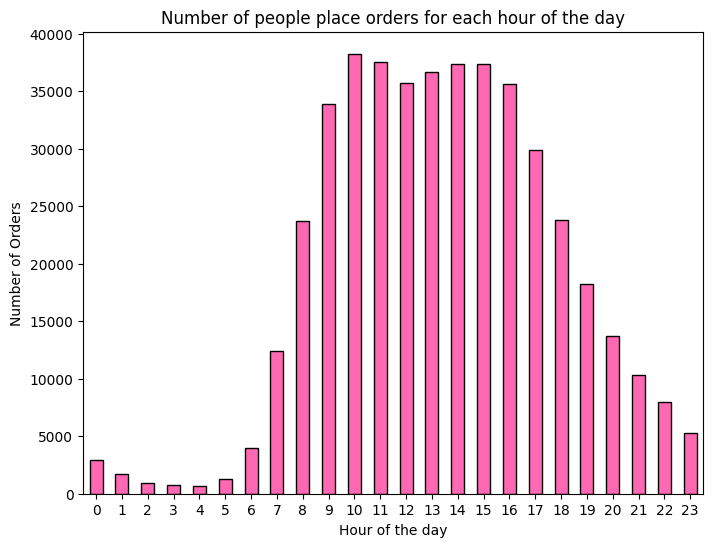

In [ ]:
## Create a plot that shows how many people place orders for each hour of the day.
plt.figure(figsize=(8, 6))
time_people_shop_groceries.plot(kind='bar', 
                                color='hotpink', 
                                title='Number of people place orders for each hour of the day',
                                xlabel='Hour of the day',
                                ylabel='Number of Orders',
                                edgecolor='black',
                                rot=0)  # Keep the x-axis labels horizontal for readability

plt.show()


The graph illustrates the number of people placing orders at each hour of the day. The data in the above graph seem to be normally distributed and the data looks skewed and have larger variance. The data reveals that the orders placed are dependent on the time of the day. The orders placed gradually declines towards the end of the day. Most of the orders were placed between 7AM until 8PM as shown in the graph. Based on the graph, we found that hour of the day order is placed does effect the number of people place the order. So, during the daytime the number of orders placed is more compare to the ones placed during the nighttime. Also, after midnight the number of orders were the least. 

## What day of the week do people shop for groceries?

In [ ]:
day_people_shop_groceries = orders['order_dow'].value_counts().sort_index()
day_people_shop_groceries.index =['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print(day_people_shop_groceries)

Sunday       78749
Monday       77269
Tuesday      61925
Wednesday    57271
Thursday     56395
Friday       59907
Saturday     58619
Name: count, dtype: int64


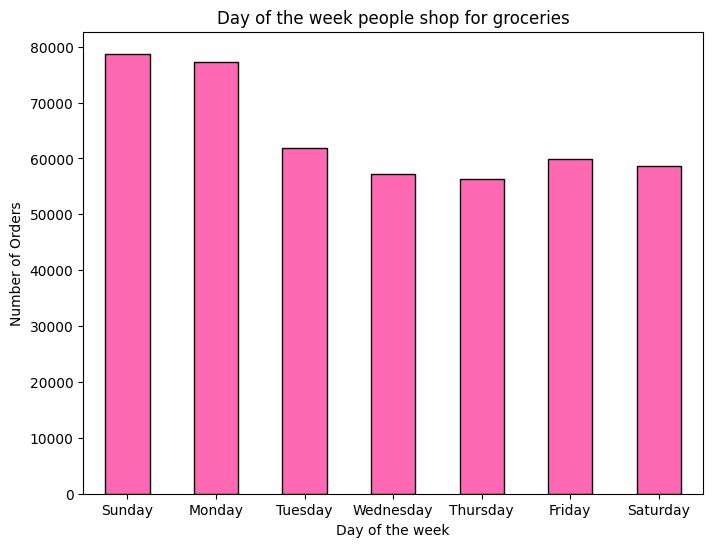

In [ ]:
## Create a plot that shows what day of the week people shop for groceries.
plt.figure(figsize=(8, 6))
day_people_shop_groceries.plot(kind='bar', 
                                color='hotpink', 
                                title='Day of the week people shop for groceries',
                                xlabel='Day of the week',
                                ylabel='Number of Orders',
                                edgecolor='black',
                                rot=0)  # Keep the x-axis labels horizontal for readability

plt.show()

The graph illustrates the day of the week people shop for groceries. The data reveals that people shop for groceries more on Suday and Monday than other weekdays.The orders placed gradually declines during weekdays and also gradually increases as it reaches close to the weekend.It can be assumed from the graph that as mostly people work during weekdays, they shop for groceries on weekends. Based on the graph, we found that when people shop for groceries is dependent on the day of the week.

## How long do people wait until placing another order?

In [ ]:
sort_orders = orders.sort_values(by=['user_id', 'order_hour_of_day'])
sort_orders_time_diff = orders.groupby('user_id')['order_hour_of_day'].diff()
time_diff = sort_orders_time_diff.dropna()

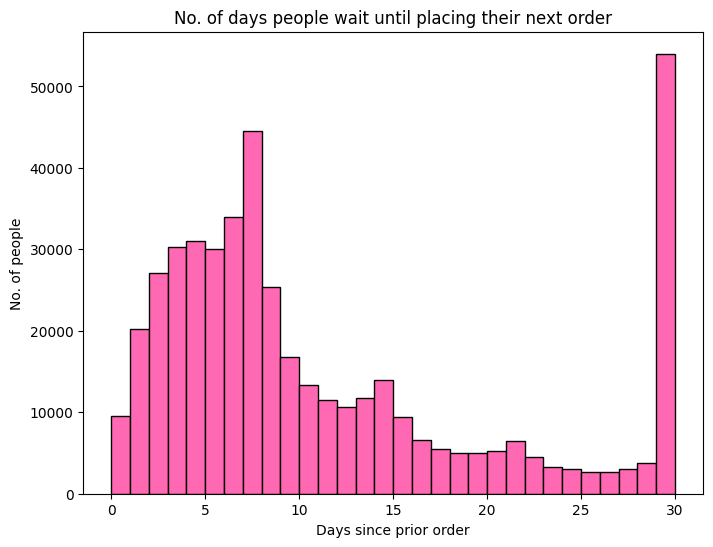

In [ ]:
## Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.
plt.figure(figsize = (8, 6))
plt.hist(orders['days_since_prior_order'], bins=30, color='hotpink', edgecolor='black')
plt.title('No. of days people wait until placing their next order')
plt.xlabel('Days since prior order')
plt.ylabel('No. of people')
plt.show()

In [ ]:
# Find the minimum and maximum values
min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()

# Comment on the minimum and maximum value
print(f"The minimum number of days between orders is: {min_days}")
print(f"The maximum number of days between orders is: {max_days}")

The minimum number of days between orders is: 0.0
The maximum number of days between orders is: 30.0


### Conclusion:
The graph illustrates the number of days people wait until placing another order. The data shows that most people wait until a month before placing another order. There is another huge spike on 7th day, which illustrates that those who mostly work on weekdays and buy groceries during weekends, wait until another weekend to buy their groceries, due to which they end up waiting for 7 days. Also, it can be seen that there are more people replacing orders in between 0 - 7 days and it drops after one week. 
The minimum values for the no. of days people wait until placing their next order is 0, while the maximum value is 30. This signifies that most of the people buy a month grocieries together. Along with this, the next leap after which people are buying groceries is of 7 days, which signifies that people you buy groceries once a week.

## Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [ ]:
wed_orders = orders[orders['order_dow'] == 3]
display(wed_orders.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2.0
16,3109465,55090,19,3,15,9.0
30,1890318,193501,3,3,15,30.0
35,125325,106853,6,3,19,30.0
43,698527,95296,58,3,14,22.0


In [ ]:
sat_orders = orders[orders['order_dow'] == 6]
display(sat_orders.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
20,50934,178510,9,6,9,5.0
26,1844247,122558,4,6,18,30.0


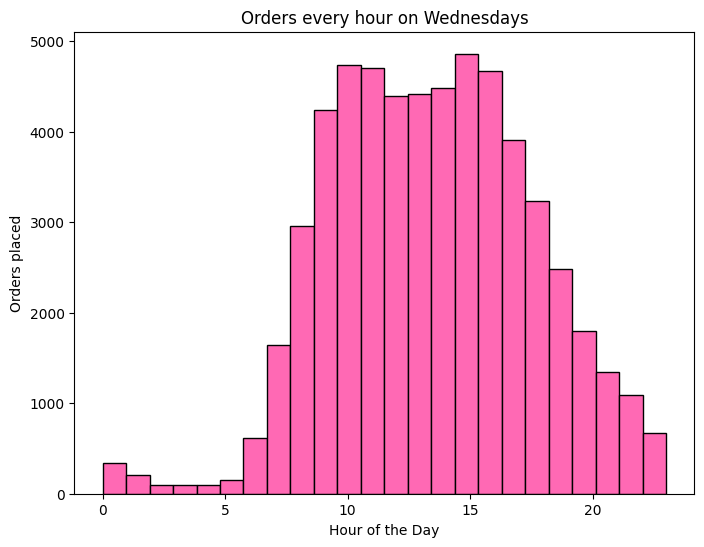

In [ ]:
# Histogram wednesday
plt.figure(figsize=(8, 6))
plt.hist(wed_orders['order_hour_of_day'], bins=24, color='hotpink', edgecolor='black')
plt.title('Orders every hour on Wednesdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Orders placed')
plt.show()

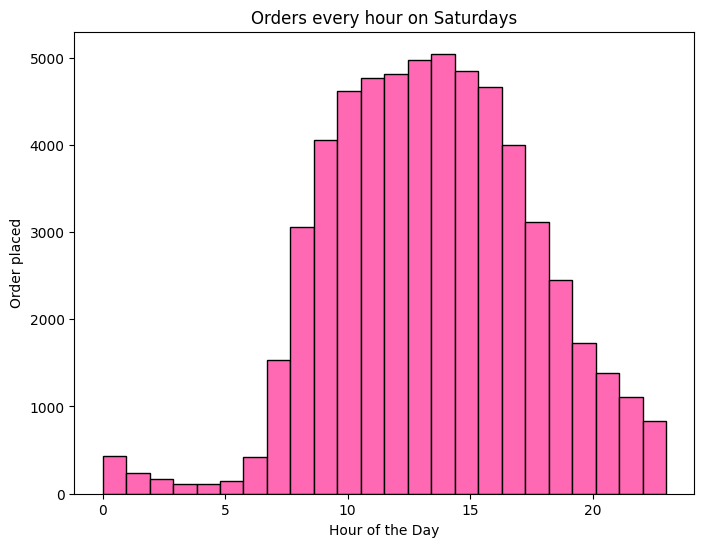

In [ ]:
# Histogram saturday
plt.figure(figsize=(8, 6))
plt.hist(sat_orders['order_hour_of_day'], bins=24, color='hotpink', edgecolor='black')
plt.title('Orders every hour on Saturdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Order placed')
plt.show()

The distribution of the orders placed every hour on Wednesdays and Saturdays are similar. Both the graphs are right screwed, which shows that there are less order placed after midnight. After almost 6 in the morning, the number of orders placed increased and were increasing until next couple hours. The only difference I can see when comparing the orders placed on Wed and Sat are during peak hours which are from 10 in the morning till 5 in the evening. On Wed, there are less orders placed during those peak hours compared to orders placed on Sat. This graphs shows that as a Wed is a weekday and Sat a weekend, more people place orders during peak hours compare to Wed when people have work next day.


## What's the distribution for the number of orders per customer?

In [ ]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()
orders_per_customer.describe()

count    149597.000000
mean          3.008984
std           2.755095
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64

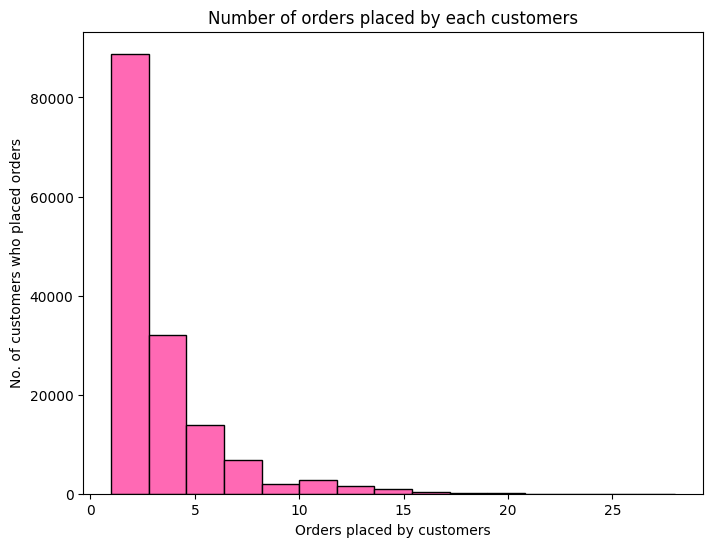

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(orders_per_customer, bins=15, color='hotpink', edgecolor='black')
plt.title('Number of orders placed by each customers')
plt.xlabel('Orders placed by customers')
plt.ylabel('No. of customers who placed orders')
plt.show()

The graph above illustrates that the range of the orders placed by the customers on instacart is from 0 - 21. Most of the customers placed atleast one order on instacart. It can be seen that as the number of orders placed by the customer increases, the number of people who placed orders decreases. 

## What are the top 20 popular products?

In [ ]:
data_merge = products.merge(order_products,
                           on='product_id')
data_merge = data_merge.drop('aisle_id', axis='columns')
data_merge = data_merge.drop('department_id', axis='columns')
data_merge = data_merge.drop('product_name', axis='columns')
display(data_merge.head())

,product_id,lowercase_product_name,order_id,add_to_cart_order,reordered
0,1,chocolate sandwich cookies,1104373,11,1
1,1,chocolate sandwich cookies,1774977,4,1
2,1,chocolate sandwich cookies,652770,10,0
3,1,chocolate sandwich cookies,1000035,6,1
4,1,chocolate sandwich cookies,1679949,9,0


In [ ]:
order_count = data_merge['product_id'].value_counts()
top_20_product_ids = order_count.head(20).index
top_20_products = products[products['product_id'].isin(top_20_product_ids)]
top_20_products = top_20_products.drop('aisle_id', axis='columns')
top_20_products = top_20_products.drop('department_id', axis='columns')

display(top_20_products.head())

,product_id,product_name,lowercase_product_name
5875,5876,Organic Lemon,organic lemon
8276,8277,Apple Honeycrisp Organic,apple honeycrisp organic
13175,13176,Bag of Organic Bananas,bag of organic bananas
16796,16797,Strawberries,strawberries
21136,21137,Organic Strawberries,organic strawberries


Based on the product names of the top 20 popular products, it can be seen that most of the top 20 product names were of organic food items, while there are some fruits and vegetables such as lemon, limes, banana, strawberries, and cucumber kirby. So, it is illustrated that people prefer organic and natural food rather than artifical food items. 

## How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
items_per_order = orders_products.groupby('order_id').size()
display("The distribution of the items bought by people in one order:")
items_per_order.describe()

'The distribution of the items bought by people in one order:'

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64

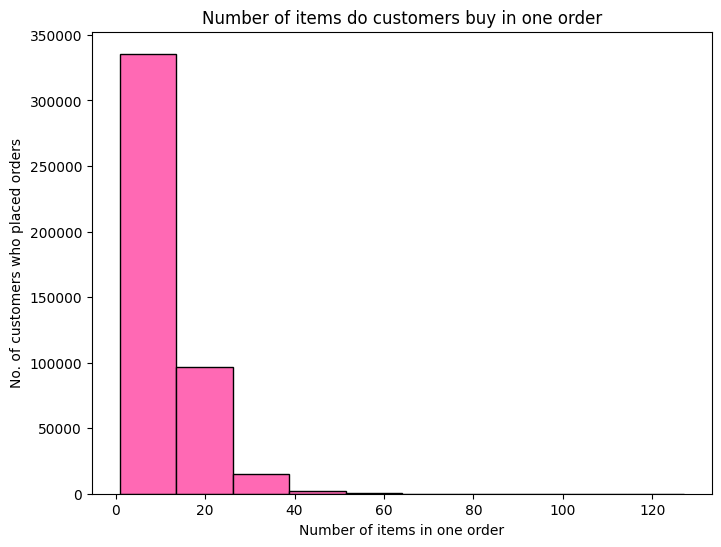

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(items_per_order, bins=10, color='hotpink', edgecolor='black')
plt.title('Number of items do customers buy in one order')
plt.xlabel('Number of items in one order')
plt.ylabel('No. of customers who placed orders')
plt.show()

The graph above illustrates that the range of the items bought by the customers in one order on instacart is from 1 - 60. The average number of items customers bought in an order are 20 items, but half the customers have 8 items in an order. From the distibution of the items bought by people in one order, it can be known that most of the customers had bought atleast one item in an order on instacart, while few had bouught almost 127 items in an order. Half of the customers had bought 8 items in an order.It looks like a typical order placed by a customers on instacart would consist of 10 items. 

## What are the top 20 items that are reordered most frequently?

In [ ]:
reorder_items = orders_products[orders_products['reordered'] == 1]

reorder_counts = reorder_items.groupby('product_id')['order_id'].count().reset_index()
display(reorder_counts.head())

,product_id,order_id
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6


In [ ]:
reorder_counts.columns = ['product_id', 'reorder_count']

top_20_reordered = reorder_counts.sort_values(by='reorder_count', ascending=False).head(20)
display(top_20_reordered.head())

,product_id,reorder_count
18104,24852,55763
9528,13176,44450
15368,21137,28639
15936,21903,26233
34407,47209,23629


In [ ]:
top_20_reordered = products.merge(top_20_reordered,
                           on='product_id')

display(top_20_reordered[['product_id', 'product_name', 'reorder_count']].sort_values(by='reorder_count', ascending=False))

,product_id,product_name,reorder_count
7,24852,Banana,55763
2,13176,Bag of Organic Bananas,44450
4,21137,Organic Strawberries,28639
5,21903,Organic Baby Spinach,26233
15,47209,Organic Hass Avocado,23629
17,47766,Organic Avocado,18743
10,27845,Organic Whole Milk,16251
16,47626,Large Lemon,15044
11,27966,Organic Raspberries,14748
3,16797,Strawberries,13945


The data illustrates that the top 20 items that are reordered frequently are among the top 20 popular items. Among those most of the items are organic and consists of naturals items such as banana, limes, lemon, and cucumber. Not only that they are not among the top 20 popular items, but they are in the same order as in the 20 popular items. So, it can be concluded that the top 20 items that are reordered frequently are the top 20 popular items. 

## What are the top 20 items that people put in their carts first? 

In [ ]:
# Filter for the first item in each order
first_items = orders_products[orders_products['add_to_cart_order'] == 1]

In [ ]:
# Count the number of times each product is the first item in the cart
first_item_counts = first_items['product_id'].value_counts()

# Get the top 20 products by frequency of being the first item
top_20_first_items_ids = first_item_counts.head(20).index

In [ ]:
# Merge with products to get product names
top_20_first_items = products[products['product_id'].isin(top_20_first_items_ids)]

display(top_20_first_items[['product_id', 'product_name']])

,product_id,product_name
195,196,Soda
5784,5785,Organic Reduced Fat 2% Milk
12340,12341,Hass Avocados
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
19659,19660,Spring Water
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes


The data illustrates that the top 20 items that people put in their carts first includes items thare are among the top popular items and among the ones reordered most frequently. Along with those natural and organic items, it also includes soda becoming the top items among the list of items which are placed in the cart first.  

## Overall conclusion:
   In this project, we worked with data from Instacart. The dataset provided for this project has been modified from the original. After the data is cleaned, the data is used to prepare a report that gave an insight into the shopping habits of Instacart customers. From the data, it is known that Instacart customers have diverse shopping habits. As there are customers ordering at any hour of the day, most of the customers prefer to buy during daytime starting from 7 in the morning till 8 at night. This showed that the number of orders placed gradually declines towards the end of the day. Also there are customers ordering at any day of the week, but most of the customers buy groceries on Sunday and Monday. Thus, the data reveals that the number of orders placed are dependent on the time and day orders are placed. Most of the Instacart customers wait a week and a month until placing another order. This shows that most of the customers buy groceries during weekend and once in a month. Also, most of the items bought by the customers are organic food items including natural food such as fruits and vegetables. Those are the same items which are among the most popular items, top items reordered most frequently, and lastly among the items people put in their carts first. One such item in the top 20 items that people put in their cart first which is artificial is Sodas. This data shows that most of the instacart customers are more in buying organic grocieries items rather than artifical ones. 